In [1]:
import pandas as pd
from dotenv import load_dotenv
import os
load_dotenv()
DF_PATH = os.getenv('DF_MODEL')
df = pd.read_csv(DF_PATH)
df.head()

,companycode,ano,periodo,ativos_circulantes,ativos_não_circulantes,total_de_ativos,passivos_circulantes,passivos_não_circulantes,total_do_passivo_e_patrimônico_líquido,patrimônio_líquido,...,fco_divida,fcf_divida,cobertura_juros,ebitda_divida,giro_ativos,ciclo_estoques,ciclo_recebiveis,ciclo_pagamentos,ciclo_estoques_dias,score_total
0,ADEL,2008,3_Meses,82082356.0,16000553.0,98082909.0,49511334.0,2498829.0,98082909.0,46072746.0,...,-4.509550,-4.664420,-18.401068,0.841152,0.242154,-2.010322,2.374165,-0.169180,-733.767538,2.2875
1,ADEL,2008,6_Meses,88600612.0,16099148.0,104699760.0,55983895.0,2490529.0,104699760.0,46225336.0,...,-1.489560,-1.540716,-10.595002,0.513515,0.468567,-0.939450,1.268414,-0.101706,-342.899268,2.4125
2,ADEL,2008,9_Meses,94009683.0,15551293.0,109560976.0,54753842.0,2571602.0,109560976.0,52235532.0,...,-1.103726,-1.141631,-6.868930,0.626646,0.687130,-0.628661,0.916802,-0.038461,-229.461288,2.6500
3,ADEL,2008,Anual,45582654.0,15170747.0,60753401.0,8454967.0,2891157.0,60753401.0,49407277.0,...,-13.849306,-14.324928,-4.650982,7.076576,1.231006,-0.729009,0.046323,-0.035645,-266.088413,3.0625
4,ADEL,2009,3_Meses,82082356.0,16000553.0,98082909.0,49511334.0,2498829.0,98082909.0,46072746.0,...,-4.509550,-4.664420,-18.401068,0.841152,0.242154,-2.010322,2.374165,-0.169180,-733.767538,2.2875


In [2]:
df.isnull().sum()

companycode                                              0
ano                                                      0
periodo                                                  0
ativos_circulantes                                       0
ativos_não_circulantes                                   0
total_de_ativos                                          0
passivos_circulantes                                     0
passivos_não_circulantes                                 0
total_do_passivo_e_patrimônico_líquido                   0
patrimônio_líquido                                       0
receita_de_vendas                                        0
lucro_bruto                                              0
ebit                                                     0
lucro_periodo                                            0
lucro_prejuízo_líquido_do_período                        0
despesas_financeiras                                     0
despesas_gerais_e_administrativas                       

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [4]:
# Features e target
X = df.drop(columns=['score_total','companycode','ano','periodo','data'])
y = df['score_total']

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
X.columns.to_list()

['ativos_circulantes',
 'ativos_não_circulantes',
 'total_de_ativos',
 'passivos_circulantes',
 'passivos_não_circulantes',
 'total_do_passivo_e_patrimônico_líquido',
 'patrimônio_líquido',
 'receita_de_vendas',
 'lucro_bruto',
 'ebit',
 'lucro_periodo',
 'lucro_prejuízo_líquido_do_período',
 'despesas_financeiras',
 'despesas_gerais_e_administrativas',
 'cogs',
 'fluxo_de_caixa_líquido_das_atividades_operacionais',
 'fluxo_de_caixa_livre',
 'fluxo_de_caixa_das_atividades_de_financiamento',
 'fluxo_de_caixa_das_atividades_de_investimento',
 'estoques',
 'contas_a_receber',
 'contas_a_pagar',
 'dívidas_financeiras',
 'despesas_de_amortização',
 'amortization',
 'ebitda',
 'liquidez_corrente',
 'liquidez_seca',
 'endividamento_total',
 'divida_patrimonio',
 'margem_bruta',
 'margem_operacional',
 'margem_liquida',
 'margem_ebitda',
 'roa',
 'roe',
 'fco_divida',
 'fcf_divida',
 'cobertura_juros',
 'ebitda_divida',
 'giro_ativos',
 'ciclo_estoques',
 'ciclo_recebiveis',
 'ciclo_pagamentos

In [7]:
# Build da pipeline de Regressão Linear
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

In [8]:
# Fit model
print('Treinando o modelo')
pipeline.fit(X_train, y_train)

Treinando o modelo


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('imputer', ...), ('scaler', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'constant'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",0
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If

In [9]:
# Predição
y_pred = pipeline.predict(X_test)

In [10]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

In [11]:
# Results summary
metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'MAPE': mape,
    'R²': r2
}

In [12]:
# Display results
metrics_df = pd.DataFrame([metrics])
metrics_df

,MAE,MSE,RMSE,MAPE,R²
0,0.439913,0.308645,0.555558,27.494058,0.289063


In [13]:
# Resíduos
Resíduos = y_test - y_pred

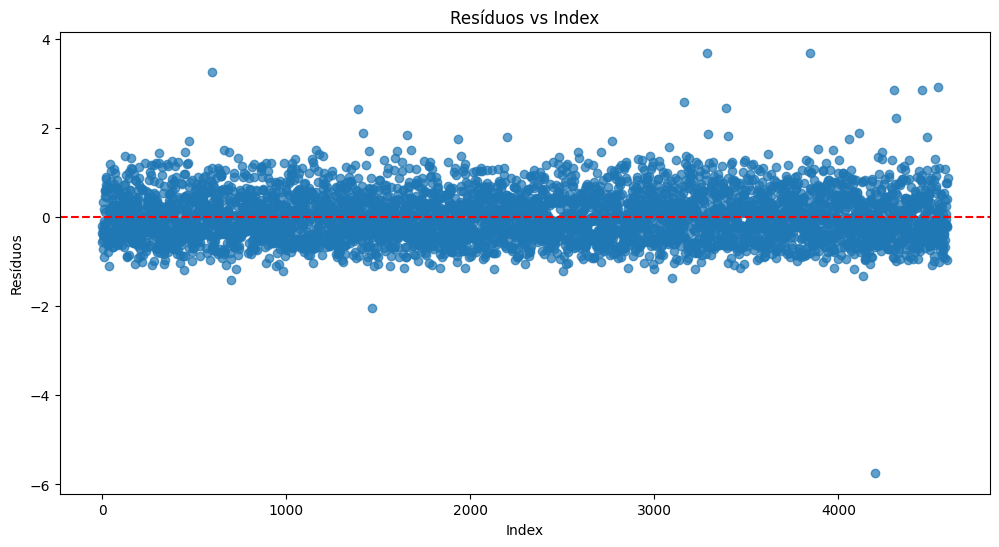

In [14]:
# Plot Resíduos vs index
plt.figure(figsize=(12, 6))
plt.scatter(range(len(Resíduos)), Resíduos, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Index')
plt.xlabel('Index')
plt.ylabel('Resíduos')
plt.show()

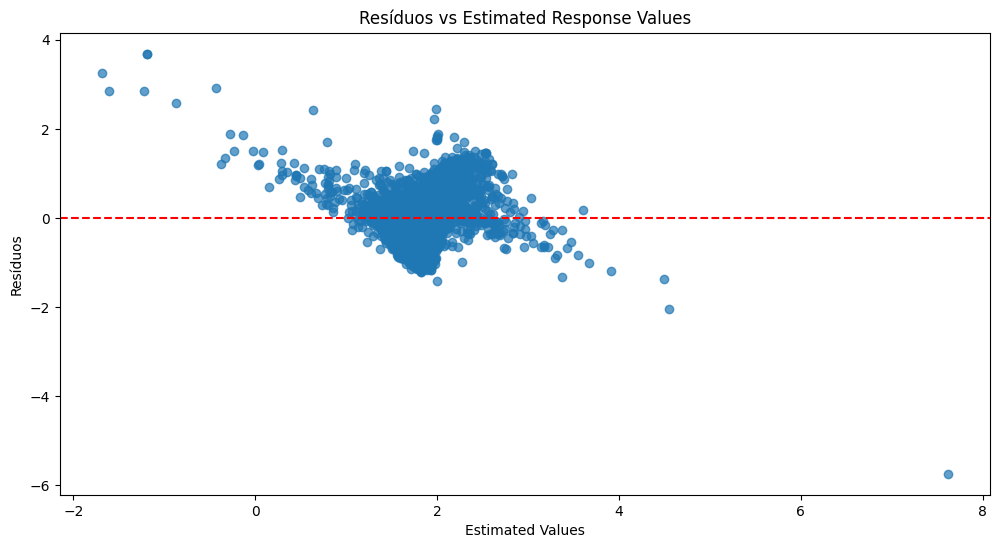

In [15]:
# Resíduos vs estimated response values
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, Resíduos, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Estimated Response Values')
plt.xlabel('Estimated Values')
plt.ylabel('Resíduos')
plt.show()

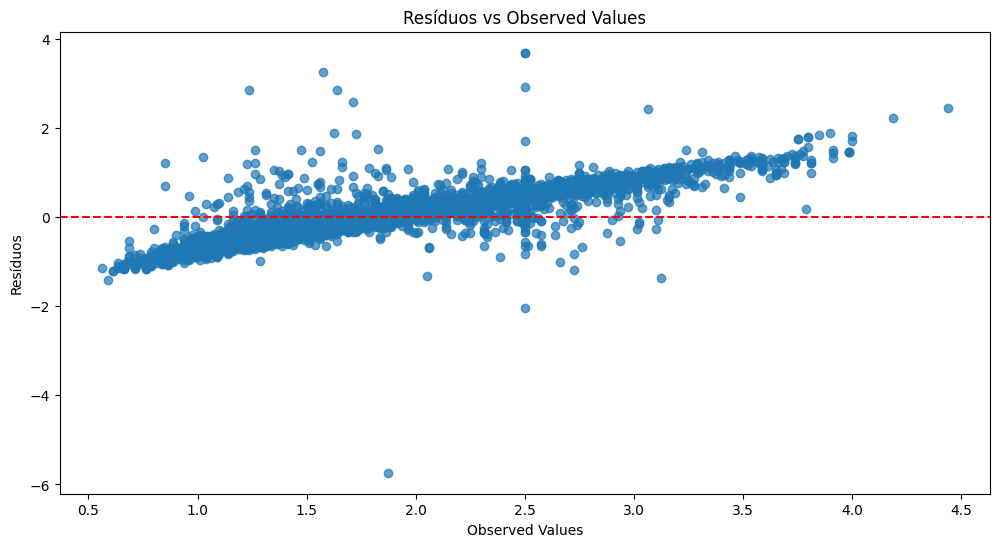

In [16]:
# Resíduos vs observations (actual values)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, Resíduos, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Observed Values')
plt.xlabel('Observed Values')
plt.ylabel('Resíduos')
plt.show()

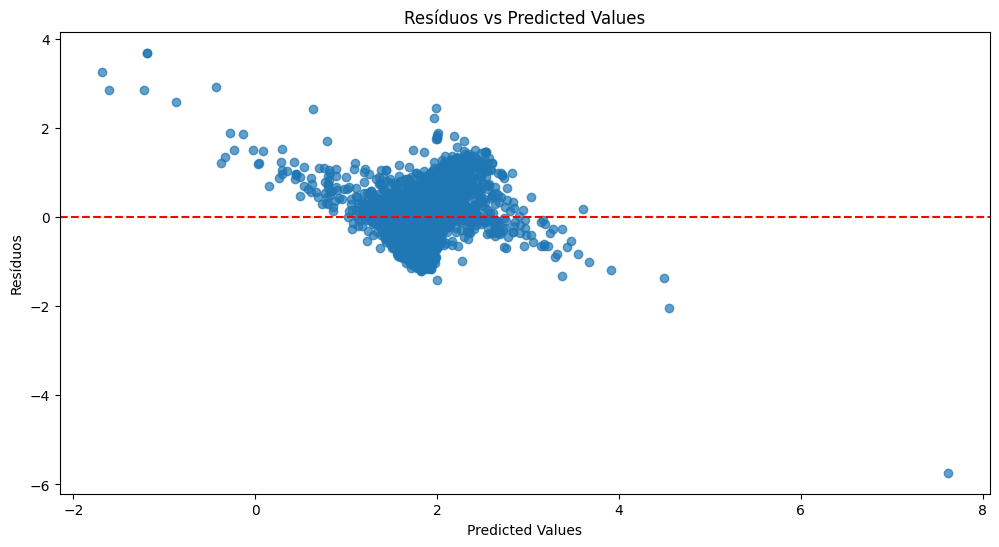

In [17]:
# Resíduos vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, Resíduos, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Resíduos')
plt.show()

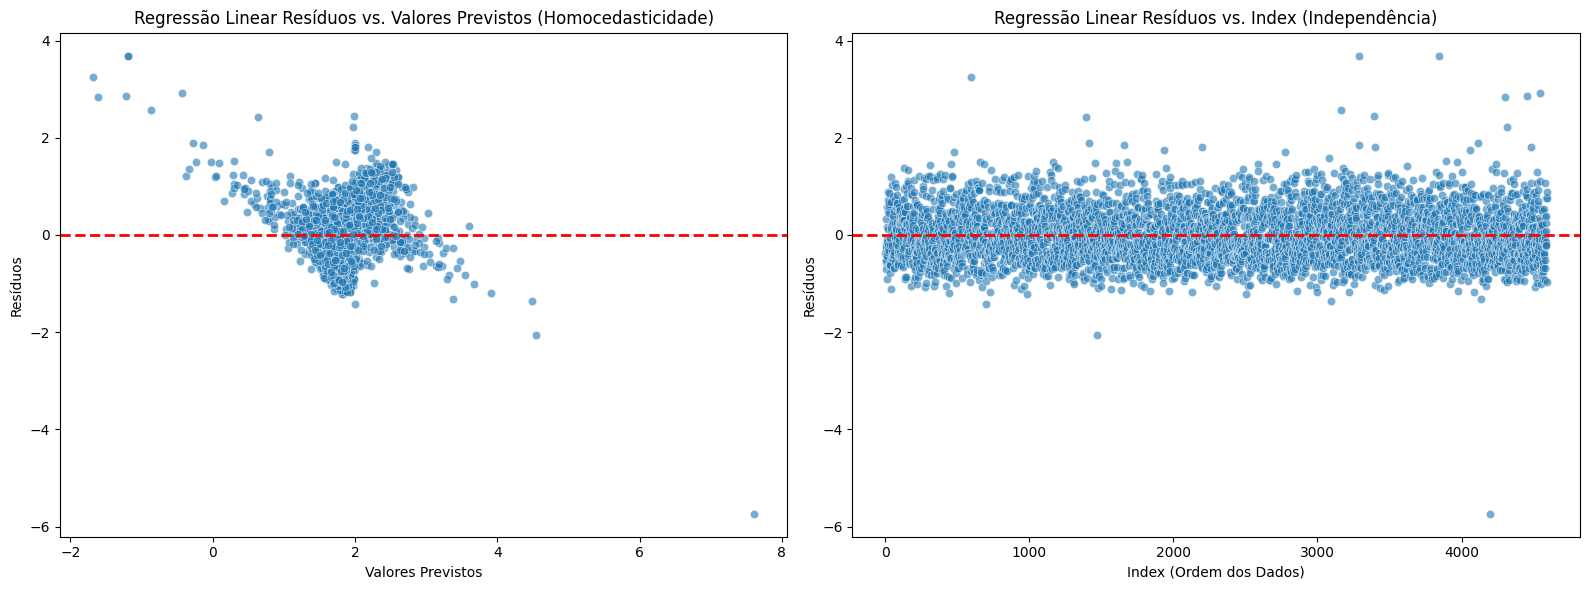

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_best_residuals(y_pred, residuals):
    """
    Plota os dois gráficos de resíduos mais importantes lado a lado.
    
    Parâmetros:
    y_pred (array): Valores previstos pelo modelo.
    residuals (array): Resíduos (y_test - y_pred).
    """
    
    # Cria uma figura com 2 subgráficos (lado a lado)
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # --- Gráfico 1: Resíduos vs Predicted Values ---
    sns.scatterplot(x=y_pred, y=residuals, ax=axes[0], alpha=0.6)
    axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2) # Linha zero
    axes[0].set_title('Regressão Linear Resíduos vs. Valores Previstos (Homocedasticidade)')
    axes[0].set_xlabel('Valores Previstos')
    axes[0].set_ylabel('Resíduos')
    
    # --- Gráfico 2: Resíduos vs Index ---
    # Criamos um índice sequencial (0, 1, 2, ...)
    index = np.arange(len(residuals))
    
    sns.scatterplot(x=index, y=residuals, ax=axes[1], alpha=0.6)
    axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2) # Linha zero
    axes[1].set_title('Regressão Linear Resíduos vs. Index (Independência)')
    axes[1].set_xlabel('Index (Ordem dos Dados)')
    axes[1].set_ylabel('Resíduos')
    
    plt.tight_layout()
    plt.show()

# --- Exemplo de Uso (Simulação) ---
# Nota: No teu código real, usa as tuas variáveis y_pred e residuos reais.
if __name__ == "__main__":
    # Dados fictícios apenas para testar a função
    np.random.seed(42)
    y_pred_demo = np.random.rand(500) * 10
    # Simulando um erro que aumenta com o valor (heterocedasticidade)
    residuos_demo = np.random.normal(0, y_pred_demo * 0.5, 500) 

    plot_best_residuals(y_pred, Resíduos)

In [19]:
# PIPELINE 2: Regressor Random Forest
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)), 
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

In [20]:
print("\nTreinando o modelo Random Forest Regressor...")
pipeline_rf.fit(X_train, y_train)


Treinando o modelo Random Forest Regressor...


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('imputer', ...), ('scaler', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'constant'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",0
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If

In [21]:
# 2. Previsões e Métricas (Random Forest)
y_pred_rf = pipeline_rf.predict(X_test)
metrics_rf = {
    'Modelo': 'Random Forest',
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'MAPE (%)': np.mean(np.abs((y_test - y_pred_rf) / (y_test + 1e-6))) * 100,
    'R²': r2_score(y_test, y_pred_rf)
}
metrics_rf_df= pd.DataFrame([metrics_rf])
metrics_rf_df

,Modelo,MAE,MSE,RMSE,MAPE (%),R²
0,Random Forest,0.068781,0.00986,0.099299,4.022904,0.977288


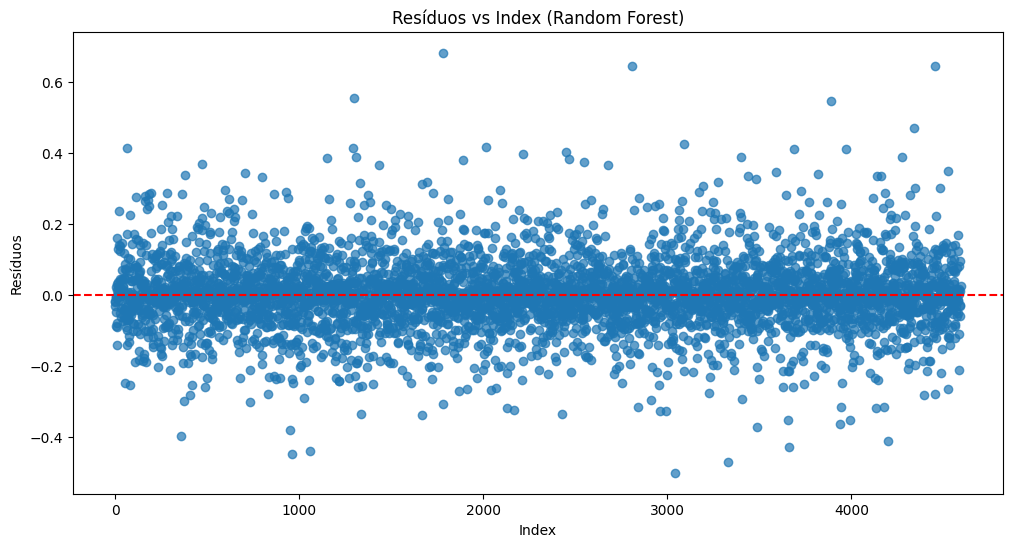

In [22]:
# Resíduos para Random Forest
Resíduos_rf = y_test - y_pred_rf

# Plot Resíduos vs index para Random Forest
plt.figure(figsize=(12, 6))
plt.scatter(range(len(Resíduos_rf)), Resíduos_rf, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Index (Random Forest)')
plt.xlabel('Index')
plt.ylabel('Resíduos')
plt.savefig('residuosIndex.png', dpi=300)
plt.show()

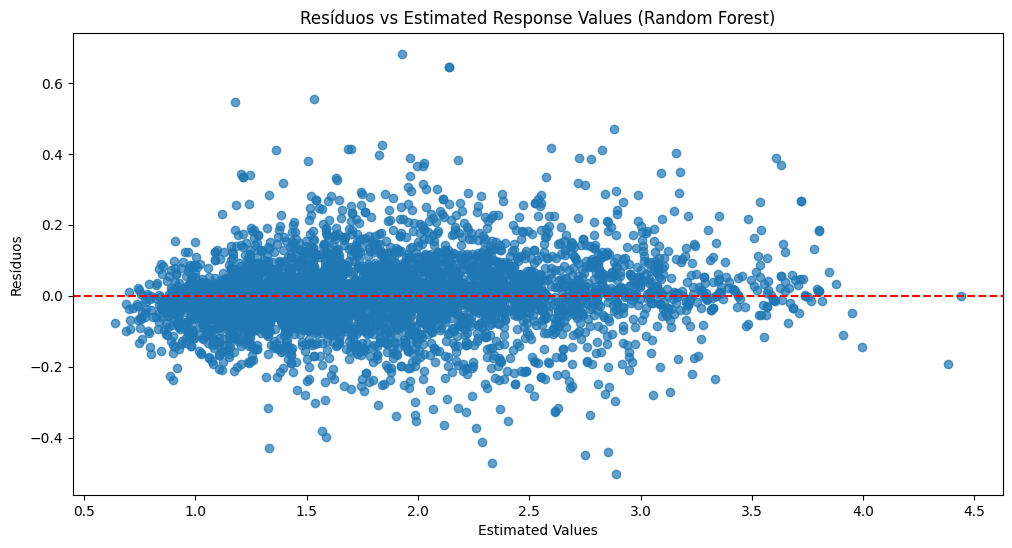

In [23]:
# Resíduos vs estimated response values para Random Forest
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_rf, Resíduos_rf, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Estimated Response Values (Random Forest)')
plt.xlabel('Estimated Values')
plt.ylabel('Resíduos')
plt.show()

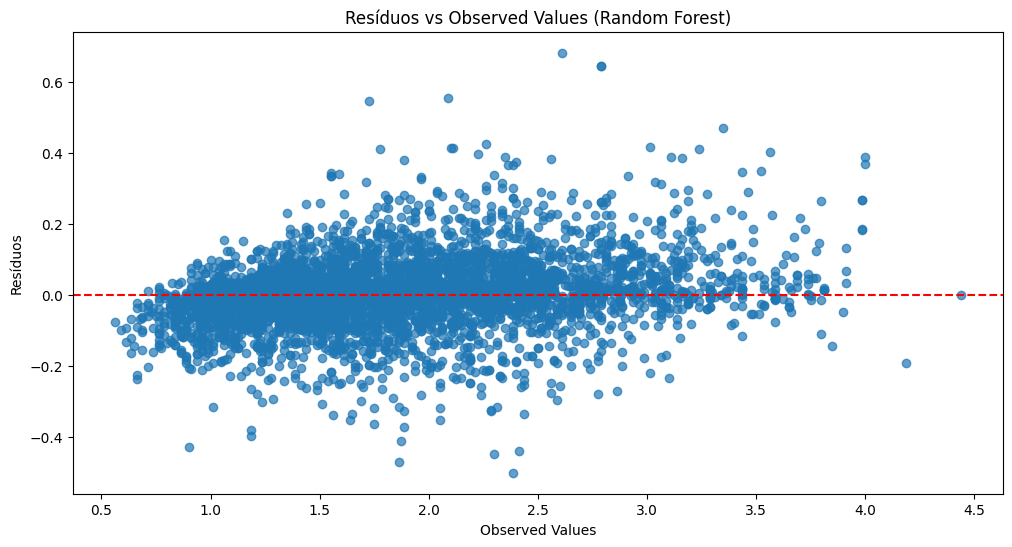

In [24]:
# Resíduos vs observations (actual values) para Random Forest
plt.figure(figsize=(12, 6))
plt.scatter(y_test, Resíduos_rf, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Observed Values (Random Forest)')
plt.xlabel('Observed Values')
plt.ylabel('Resíduos')
plt.show()

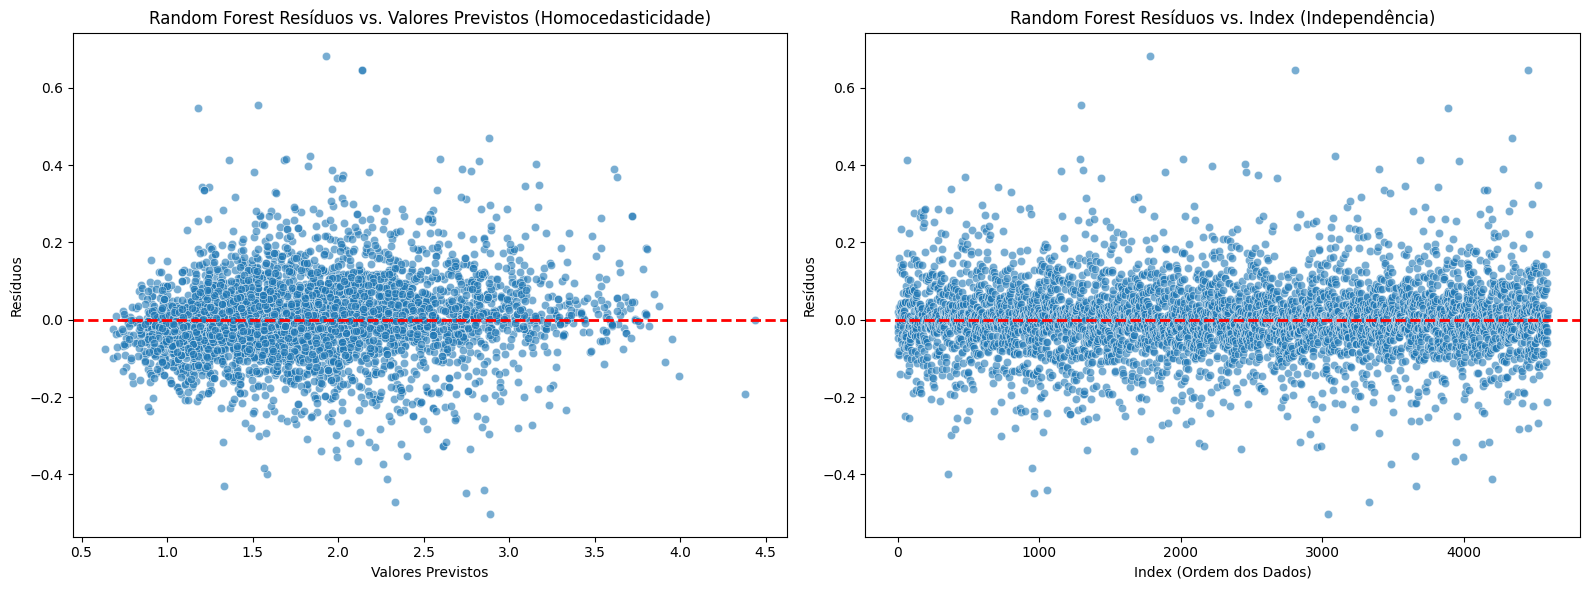

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_best_residuals(y_pred, residuals):
    """
    Plota os dois gráficos de resíduos mais importantes lado a lado.
    
    Parâmetros:
    y_pred (array): Valores previstos pelo modelo.
    residuals (array): Resíduos (y_test - y_pred).
    """
    
    # Cria uma figura com 2 subgráficos (lado a lado)
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # --- Gráfico 1: Resíduos vs Predicted Values ---
    sns.scatterplot(x=y_pred, y=residuals, ax=axes[0], alpha=0.6)
    axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2) # Linha zero
    axes[0].set_title('Random Forest Resíduos vs. Valores Previstos (Homocedasticidade)')
    axes[0].set_xlabel('Valores Previstos')
    axes[0].set_ylabel('Resíduos')
    
    # --- Gráfico 2: Resíduos vs Index ---
    # Criamos um índice sequencial (0, 1, 2, ...)
    index = np.arange(len(residuals))
    
    sns.scatterplot(x=index, y=residuals, ax=axes[1], alpha=0.6)
    axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2) # Linha zero
    axes[1].set_title('Random Forest Resíduos vs. Index (Independência)')
    axes[1].set_xlabel('Index (Ordem dos Dados)')
    axes[1].set_ylabel('Resíduos')
    
    plt.tight_layout()
    plt.show()

# --- Exemplo de Uso (Simulação) ---
# Nota: No teu código real, usa as tuas variáveis y_pred e residuos reais.
if __name__ == "__main__":

    plot_best_residuals(y_pred_rf, Resíduos_rf)

In [26]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
import numpy as np

In [27]:
# Definir modelo
model = RandomForestRegressor(random_state=42)


In [28]:
# Definir KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
kfold

KFold(n_splits=5, random_state=42, shuffle=True)

In [29]:
# Definir métrica de avaliação
#mae_scorer = make_scorer(mean_absolute_error)

In [30]:
# Aplicar validação cruzada
#mae_scores = cross_val_score(model, X, y, cv=kfold, scoring=mae_scorer)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
# Listas para armazenar métricas
mae_list, mse_list, rmse_list, mape_list, r2_list = [], [], [], [], []

# Loop pelos folds
for train_index, val_index in kfold.split(X):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_val_fold)

    # Calcular métricas
    mae = mean_absolute_error(y_val_fold, y_pred)
    mse = mean_squared_error(y_val_fold, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_val_fold - y_pred) / y_val_fold)) * 100
    r2 = r2_score(y_val_fold, y_pred)

    # Armazenar
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mape_list.append(mape)
    r2_list.append(r2)

# Resultados Médios
print("Validação Cruzada (K-Fold = 5):")
print(f"MAE médio: {np.mean(mae_list):.4f}")
print(f"MSE médio: {np.mean(mse_list):.4f}")
print(f"RMSE médio: {np.mean(rmse_list):.4f}")
print(f"MAPE médio (%): {np.mean(mape_list):.4f}")
print(f"R² médio: {np.mean(r2_list):.4f}")


Validação Cruzada (K-Fold = 5):
MAE médio: 0.0665
MSE médio: 0.0093
RMSE médio: 0.0963
MAPE médio (%): 3.9222
R² médio: 0.9787


In [33]:
# Separar último ano como teste (ex: 2024)
df_train = df[df['data'] < '2024-01-01']
df_test  = df[df['data'] >= '2024-01-01']

In [34]:
# Features e target corretos
feat = df_train.drop(columns=['score_total','companycode','ano','periodo','data']).columns.to_list()

In [35]:

X_train = df_train[feat]
y_train = df_train['score_total']

In [36]:
X_test = df_test[feat]
y_test = df_test['score_total']

In [37]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [38]:
# Prever
y_pred = model.predict(X_test)

# Avaliação
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\nValidação Temporal (Holdout - Teste em 2024):")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"R²: {r2:.4f}")



Validação Temporal (Holdout - Teste em 2024):
MAE: 0.0864
MSE: 0.0134
RMSE: 0.1156
MAPE: 5.6557
R²: 0.9659


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Lucas\AppData\Local\Temp\ipykernel_13744\4266613111.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


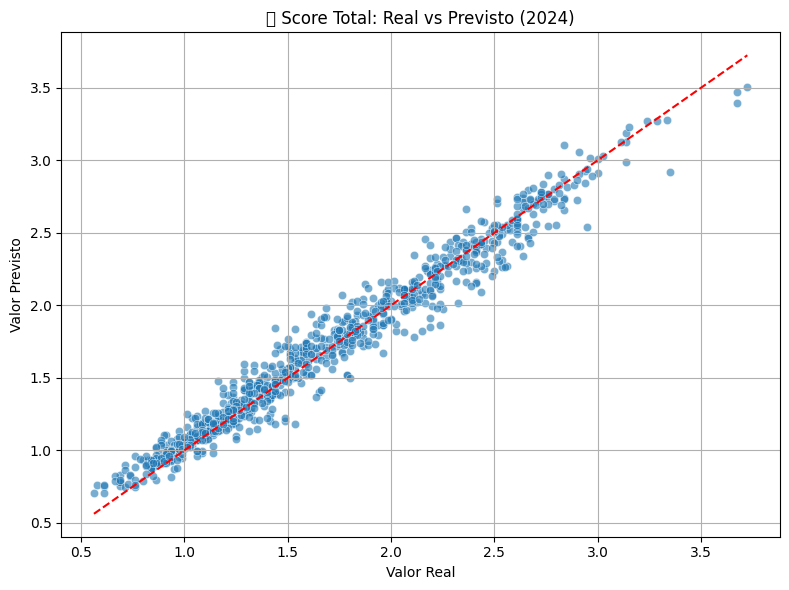

In [40]:
# Previsão
y_pred = model.predict(X_test)

# Gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('📊 Score Total: Real vs Previsto (2024)')
plt.grid(True)
plt.tight_layout()
plt.show()


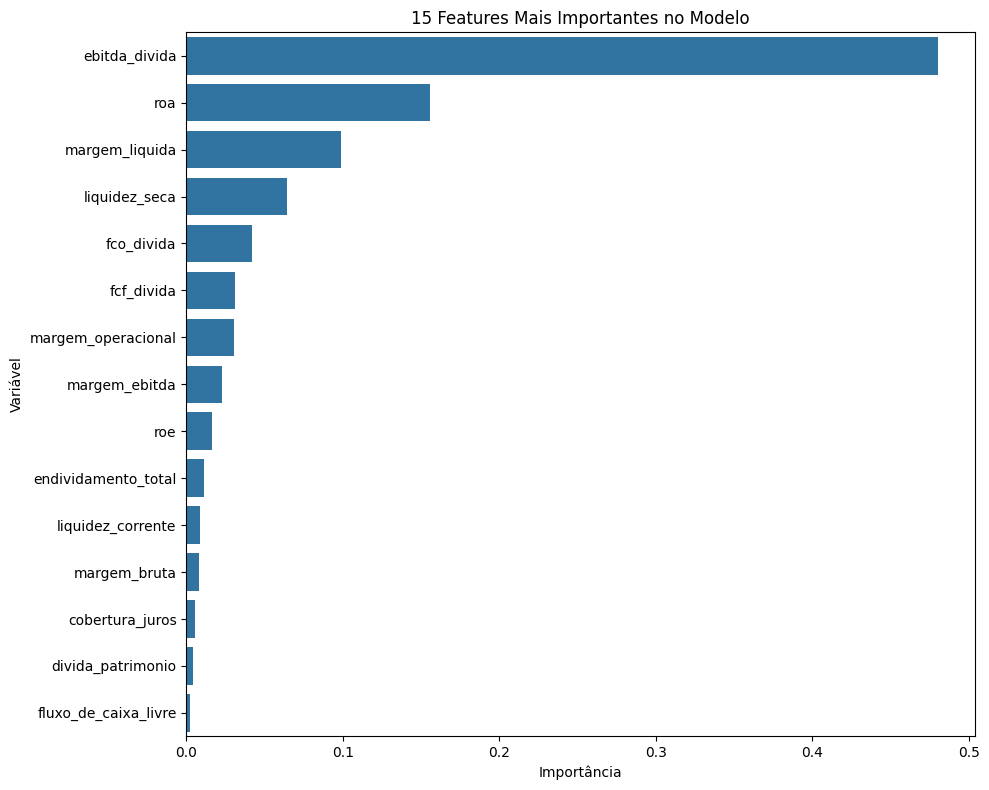

In [41]:
import pandas as pd

# Importância
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=feat).sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(10, 8))
sns.barplot(x=feat_importance.values[:15], y=feat_importance.index[:15])
plt.title('15 Features Mais Importantes no Modelo')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

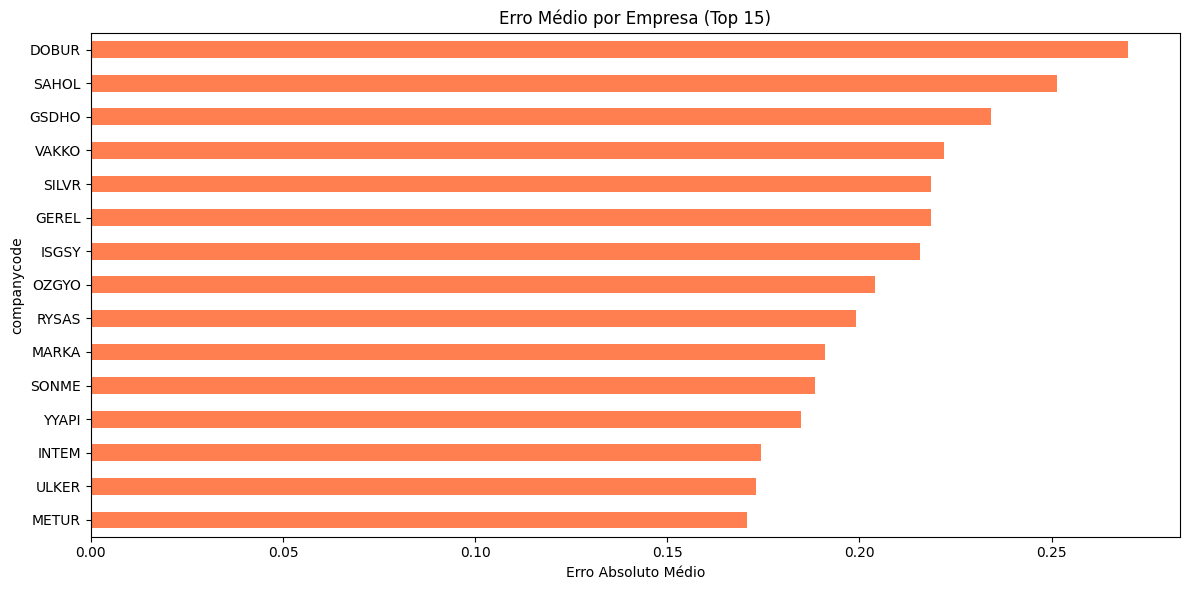

In [42]:
# Adiciona erro absoluto à base de teste
df_test = df_test.copy()
df_test['y_pred'] = y_pred
df_test['erro_absoluto'] = abs(df_test['score_total'] - df_test['y_pred'])

# Agrupamento por empresa
erro_por_empresa = df_test.groupby('companycode')['erro_absoluto'].mean().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(12, 6))
erro_por_empresa.head(15).plot(kind='barh', color='coral')
plt.xlabel('Erro Absoluto Médio')
plt.title('Erro Médio por Empresa (Top 15)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [43]:
import shap

# Criar explainer SHAP (para modelos baseados em árvore)
explainer = shap.TreeExplainer(model)

# Calcular valores SHAP (pode demorar para muitos dados)
shap_values = explainer.shap_values(X_test)


C:\Users\Lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\Lucas\AppData\Local\Temp\ipykernel_13744\381616194.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar")


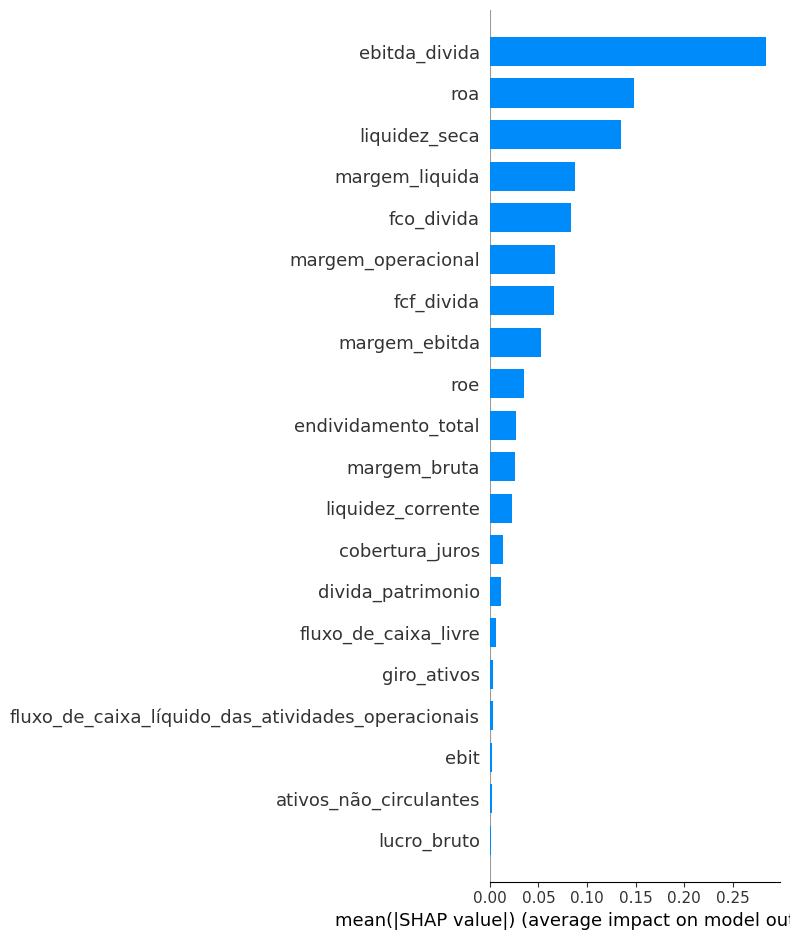

In [44]:
# Sumário global: impacto médio de cada variável
shap.summary_plot(shap_values, X_test, plot_type="bar")


C:\Users\Lucas\AppData\Local\Temp\ipykernel_13744\2310202683.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


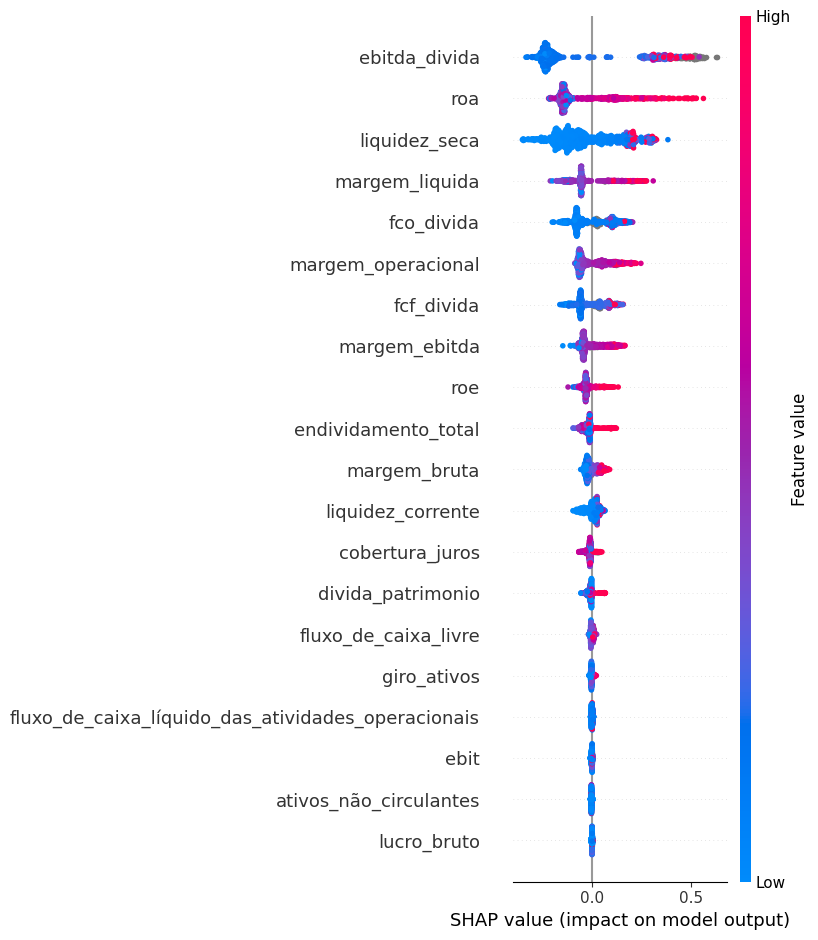

In [45]:
# Mostra como cada feature afeta o output (positivo ou negativo)
shap.summary_plot(shap_values, X_test)


In [46]:
# Exemplo: primeira empresa do conjunto de teste
#idx = 3 # ou use um index específico

# Força da contribuição de cada feature para o score
#shap.plots.waterfall(explainer(X_test.iloc[idx]))


In [47]:
#Isso mostra exatamente por que aquela empresa recebeu aquele score — quais indicadores ajudaram ou prejudicaram a nota.

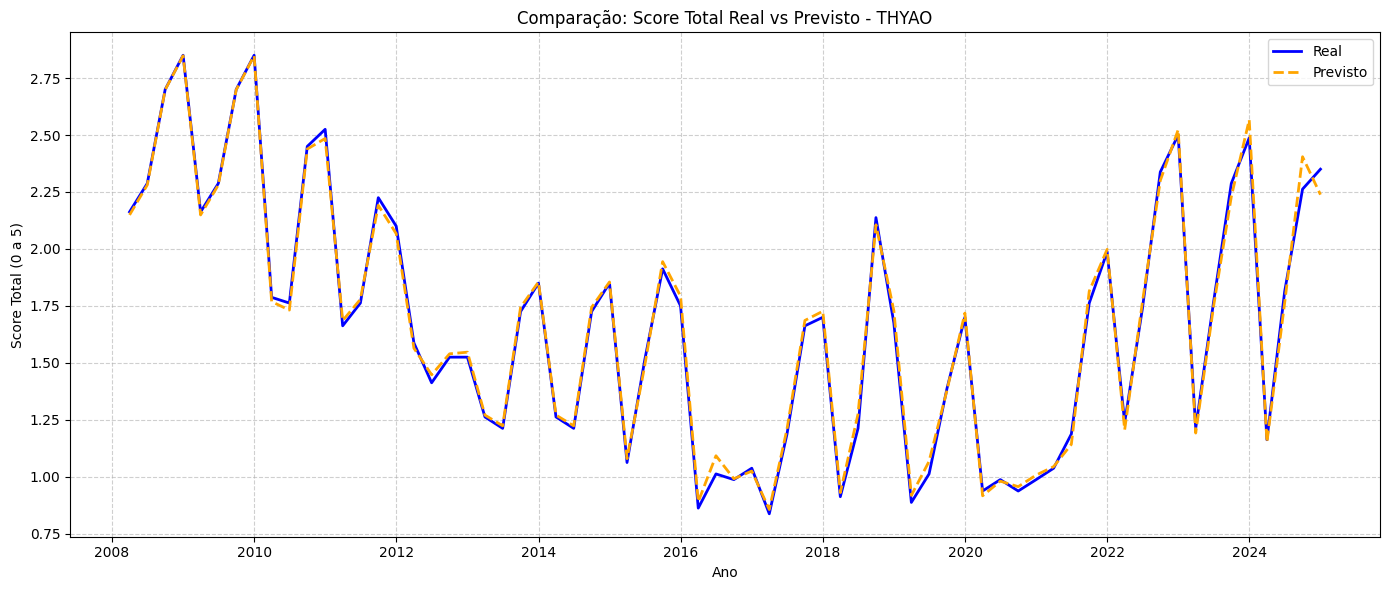

In [48]:
# Filtrar apenas THYAO
df_thyao_real = df[df['companycode'] == 'THYAO'].copy()
df_thyao_real['data'] = pd.to_datetime(df_thyao_real['data'])

# Ordenar cronologicamente para evitar linhas riscando o gráfico
df_thyao = df_thyao_real.sort_values('data')

# Prever usando o modelo treinado (usando todas as colunas de features já conhecidas)
X_thyao = df_thyao_real.drop(columns=['score_total', 'companycode', 'ano', 'periodo', 'data'])
y_thyao_pred = model.predict(X_thyao)

# Adicionar coluna de previsão ao DataFrame
df_thyao_real['score_predito'] = y_thyao_pred

# Plotar
plt.figure(figsize=(14, 6))
plt.plot(df_thyao_real['data'], df_thyao_real['score_total'], label='Real', color='blue', linewidth=2)
plt.plot(df_thyao_real['data'], df_thyao_real['score_predito'], label='Previsto', color='orange', linestyle='--', linewidth=2)

plt.title('Comparação: Score Total Real vs Previsto - THYAO')
plt.xlabel('Ano')
plt.ylabel('Score Total (0 a 5)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Criar um ranking baseado na média histórica do Score Total
ranking_historico = df.groupby('companycode')['score_total'].mean().sort_values(ascending=False)

# 2. Identificar os extremos
melhor_empresa = ranking_historico.index[0]   # A primeira da lista
pior_empresa = ranking_historico.index[-1]    # A última da lista

# Garantir que não selecionamos a própria THYAO como melhor/pior (para não duplicar)
if melhor_empresa == 'THYAO':
    melhor_empresa = ranking_historico.index[1]
if pior_empresa == 'THYAO':
    pior_empresa = ranking_historico.index[-2]

print(f"✈️ Empresa Foco: THYAO")
print(f"🏆 Melhor Desempenho (Benchmark Positivo): {melhor_empresa} (Média: {ranking_historico[melhor_empresa]:.2f})")
print(f"⚠️ Pior Desempenho (Benchmark Negativo): {pior_empresa} (Média: {ranking_historico[pior_empresa]:.2f})")

# 3. Filtrar o DataFrame apenas para essas 3 empresas
empresas_selecionadas = ['THYAO', melhor_empresa, pior_empresa]
df_comparacao = df[df['companycode'].isin(empresas_selecionadas)].copy()

# Definir uma ordem fixa para as cores nos gráficos
ordem_empresas = [melhor_empresa, 'THYAO', pior_empresa]
paleta_cores = {melhor_empresa: 'green', 'THYAO': 'blue', pior_empresa: 'red'}

✈️ Empresa Foco: THYAO
🏆 Melhor Desempenho (Benchmark Positivo): AKMGY (Média: 3.25)
⚠️ Pior Desempenho (Benchmark Negativo): BURCE (Média: 1.02)


In [53]:
# Criar uma cópia do DataFrame original
df_sem_thyao = df[df['companycode'] != 'THYAO'].copy()

# Verificar que THYAO foi removido
print("THYAO removido?", 'THYAO' in df_sem_thyao['companycode'].unique())

THYAO removido? False


In [54]:
df_sem_thyao

,companycode,ano,periodo,ativos_circulantes,ativos_não_circulantes,total_de_ativos,passivos_circulantes,passivos_não_circulantes,total_do_passivo_e_patrimônico_líquido,patrimônio_líquido,...,fco_divida,fcf_divida,cobertura_juros,ebitda_divida,giro_ativos,ciclo_estoques,ciclo_recebiveis,ciclo_pagamentos,ciclo_estoques_dias,score_total
0,ADEL,2008,3_Meses,8.208236e+07,1.600055e+07,9.808291e+07,4.951133e+07,2.498829e+06,9.808291e+07,4.607275e+07,...,-4.509550,-4.664420,-18.401068,0.841152,0.242154,-2.010322,2.374165,-0.169180,-733.767538,2.2875
1,ADEL,2008,6_Meses,8.860061e+07,1.609915e+07,1.046998e+08,5.598390e+07,2.490529e+06,1.046998e+08,4.622534e+07,...,-1.489560,-1.540716,-10.595002,0.513515,0.468567,-0.939450,1.268414,-0.101706,-342.899268,2.4125
2,ADEL,2008,9_Meses,9.400968e+07,1.555129e+07,1.095610e+08,5.475384e+07,2.571602e+06,1.095610e+08,5.223553e+07,...,-1.103726,-1.141631,-6.868930,0.626646,0.687130,-0.628661,0.916802,-0.038461,-229.461288,2.6500
3,ADEL,2008,Anual,4.558265e+07,1.517075e+07,6.075340e+07,8.454967e+06,2.891157e+06,6.075340e+07,4.940728e+07,...,-13.849306,-14.324928,-4.650982,7.076576,1.231006,-0.729009,0.046323,-0.035645,-266.088413,3.0625
4,ADEL,2009,3_Meses,8.208236e+07,1.600055e+07,9.808291e+07,4.951133e+07,2.498829e+06,9.808291e+07,4.607275e+07,...,-4.509550,-4.664420,-18.401068,0.841152,0.242154,-2.010322,2.374165,-0.169180,-733.767538,2.2875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15307,ZOREN,2023,Anual,2.862619e+10,1.136030e+11,1.422292e+11,4.556468e+10,4.111889e+10,1.422292e+11,5.554559e+10,...,0.696156,0.691479,-0.271034,0.154165,0.276943,-0.022592,0.219458,-0.164983,-8.246212,2.0875
15308,ZOREN,2024,3_Meses,1.561239e+10,8.488922e+10,1.005016e+11,2.302628e+10,2.854341e+10,1.005016e+11,4.893194e+10,...,0.155489,0.396787,-0.056555,-0.029762,0.056279,-0.138158,1.307473,-0.711979,-50.427586,1.3125
15309,ZOREN,2024,6_Meses,1.434187e+10,9.238784e+10,1.067297e+11,2.452030e+10,2.823591e+10,1.067297e+11,5.397350e+10,...,0.302358,0.557485,-0.049365,-0.137170,0.101941,-0.083425,0.564702,-0.451721,-30.450156,1.1625
15310,ZOREN,2024,9_Meses,1.539392e+10,9.982602e+10,1.152199e+11,2.703824e+10,2.843158e+10,1.152199e+11,5.975012e+10,...,0.621685,0.871270,-0.119853,0.072841,0.175634,-0.030435,0.318807,-0.273165,-11.108652,1.2875


In [64]:
# Separar treino e teste com base em data (2023 como holdout)
df_train = df_sem_thyao[df_sem_thyao['data'] < '2024-01-01']
df_test  = df_sem_thyao[df_sem_thyao['data'] >= '2024-01-01']

# Definir colunas de features
feat = df_train.drop(columns=['score_total', 'companycode', 'ano', 'periodo', 'data']).columns.tolist()

# Criar conjuntos
X_train = df_train[feat]
y_train = df_train['score_total']
X_test  = df_test[feat]
y_test  = df_test['score_total']

# Treinar modelo
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

model_holdout = RandomForestRegressor(random_state=42)
model_holdout.fit(X_train, y_train)

# Avaliar
y_pred = model_holdout.predict(X_test)
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print("Holdout - Validação com Empresas (exceto THYAO):")
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f},MAPE:{mape:.4f}")


Holdout - Validação com Empresas (exceto THYAO):
MAE: 0.0885, RMSE: 0.1172, R²: 0.9651,MAPE:5.8129


In [62]:
# Prever THYAO com modelo que nunca a viu
df_thyao = df[df['companycode'] == 'THYAO'].copy()
X_thyao = df_thyao[feat]
df_thyao['score_predito'] = model_holdout.predict(X_thyao)


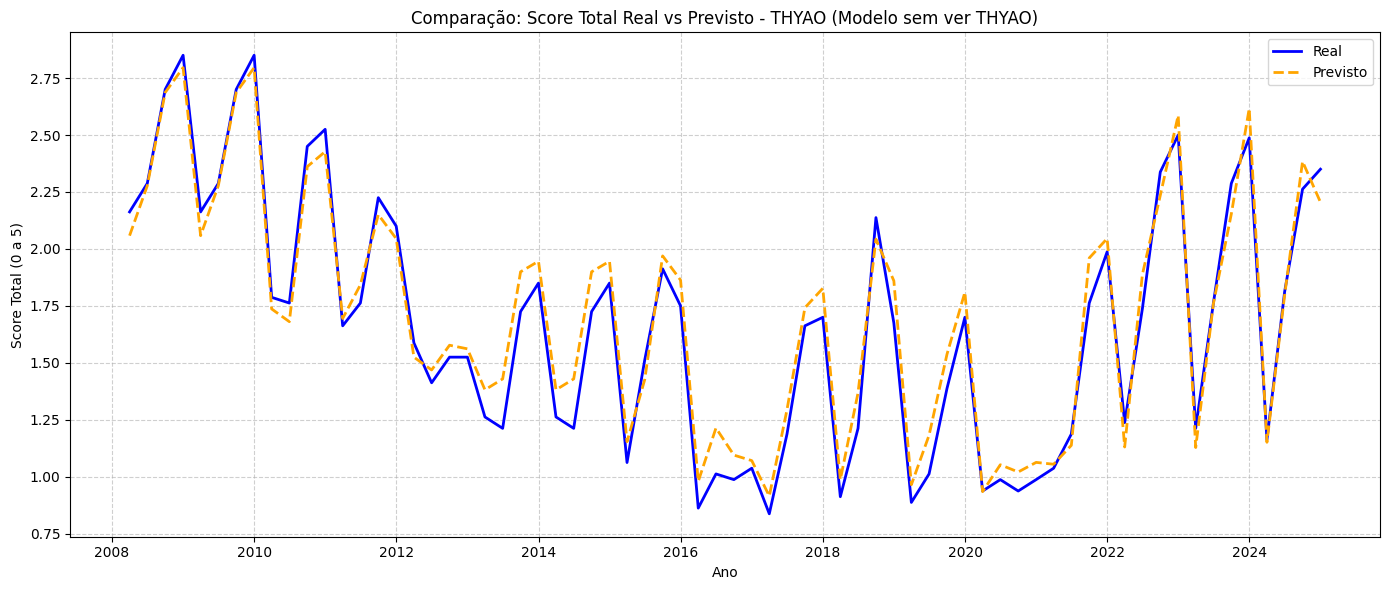

In [63]:
plt.figure(figsize=(14, 6))
# Se ainda não foi convertido no início do script, convertemos agora
df_thyao['data'] = pd.to_datetime(df_thyao['data'])

# Ordenar cronologicamente para evitar linhas riscando o gráfico
df_thyao = df_thyao.sort_values('data')

plt.plot(df_thyao['data'], df_thyao['score_total'], label='Real', color='blue', linewidth=2)
plt.plot(df_thyao['data'], df_thyao['score_predito'], label='Previsto', color='orange', linestyle='--', linewidth=2)
plt.title('Comparação: Score Total Real vs Previsto - THYAO (Modelo sem ver THYAO)')
plt.xlabel('Ano')
plt.ylabel('Score Total (0 a 5)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


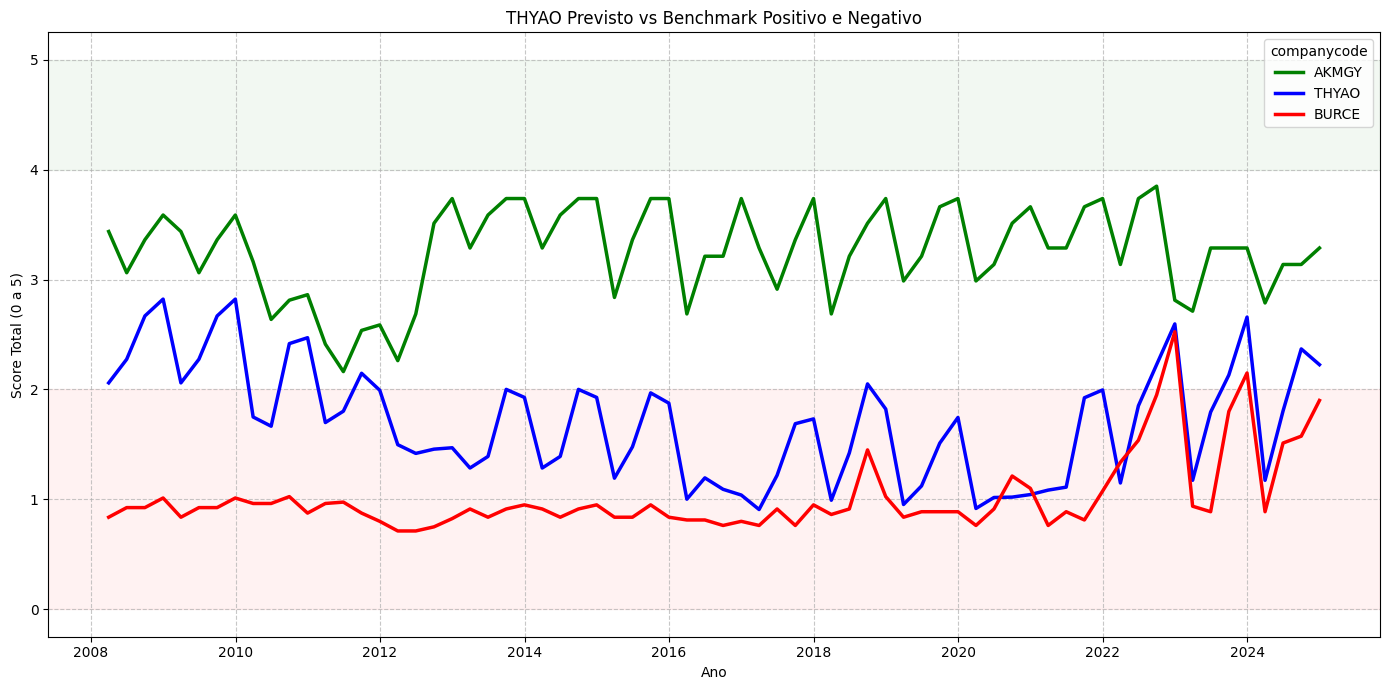

In [58]:
# Selecionar empresas extremas
ranking = df.groupby('companycode')['score_total'].mean().sort_values(ascending=False)
melhor_empresa = ranking.index[0] if ranking.index[0] != 'THYAO' else ranking.index[1]
pior_empresa = ranking.index[-1] if ranking.index[-1] != 'THYAO' else ranking.index[-2]

# Dados reais das outras duas empresas
df_extremos = df[df['companycode'].isin([melhor_empresa, pior_empresa])].copy()

# Substituir dados reais de THYAO pelo previsto
df_thyao_prev = df_thyao[['data', 'score_predito']].copy()
df_thyao_prev['companycode'] = 'THYAO'
df_thyao_prev.rename(columns={'score_predito': 'score_total'}, inplace=True)

# Combinar os três
df_final = pd.concat([df_extremos, df_thyao_prev], ignore_index=True)
# Se ainda não foi convertido no início do script, convertemos agora
df_final['data'] = pd.to_datetime(df_final['data'])

# Ordenar cronologicamente para evitar linhas riscando o gráfico
df_final = df_final.sort_values('data')

# Plotar
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_final,
    x='data',
    y='score_total',
    hue='companycode',
    palette={melhor_empresa: 'green', 'THYAO': 'blue', pior_empresa: 'red'},
    hue_order=[melhor_empresa, 'THYAO', pior_empresa],
    linewidth=2.5
)
plt.title('THYAO Previsto vs Benchmark Positivo e Negativo')
plt.axhspan(4, 5, color='green', alpha=0.05)
plt.axhspan(0, 2, color='red', alpha=0.05)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel('Score Total (0 a 5)')
plt.xlabel('Ano')
plt.tight_layout()
plt.show()


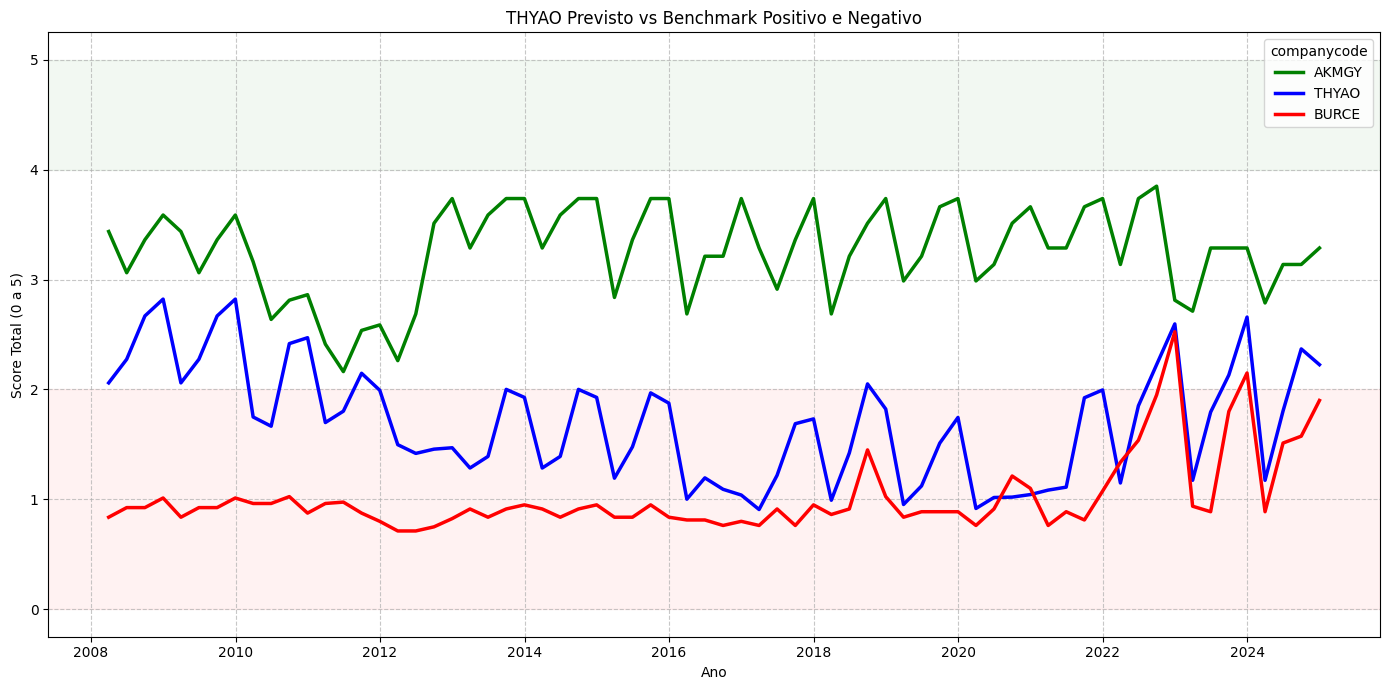

In [59]:
# Selecionar empresas extremas
ranking = df.groupby('companycode')['score_total'].mean().sort_values(ascending=False)
melhor_empresa = ranking.index[0] if ranking.index[0] != 'THYAO' else ranking.index[1]
pior_empresa = ranking.index[-1] if ranking.index[-1] != 'THYAO' else ranking.index[-2]

# Dados reais das outras duas empresas
df_extremos = df[df['companycode'].isin([melhor_empresa, pior_empresa])].copy()

# Substituir dados reais de THYAO pelo previsto
df_thyao_prev = df_thyao[['data', 'score_predito']].copy()
df_thyao_prev['companycode'] = 'THYAO'
df_thyao_prev.rename(columns={'score_predito': 'score_total'}, inplace=True)

# Combinar os três
df_final = pd.concat([df_extremos, df_thyao_prev], ignore_index=True)

# Se ainda não foi convertido no início do script, convertemos agora
df_final['data'] = pd.to_datetime(df_final['data'])

# Ordenar cronologicamente para evitar linhas riscando o gráfico
df_final = df_final.sort_values('data')

# Plotar
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_final,
    x='data',
    y='score_total',
    hue='companycode',
    palette={melhor_empresa: 'green', 'THYAO': 'blue', pior_empresa: 'red'},
    hue_order=[melhor_empresa, 'THYAO', pior_empresa],
    linewidth=2.5
)
plt.title('THYAO Previsto vs Benchmark Positivo e Negativo')
plt.axhspan(4, 5, color='green', alpha=0.05)
plt.axhspan(0, 2, color='red', alpha=0.05)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel('Score Total (0 a 5)')
plt.xlabel('Ano')
plt.tight_layout()
plt.show()


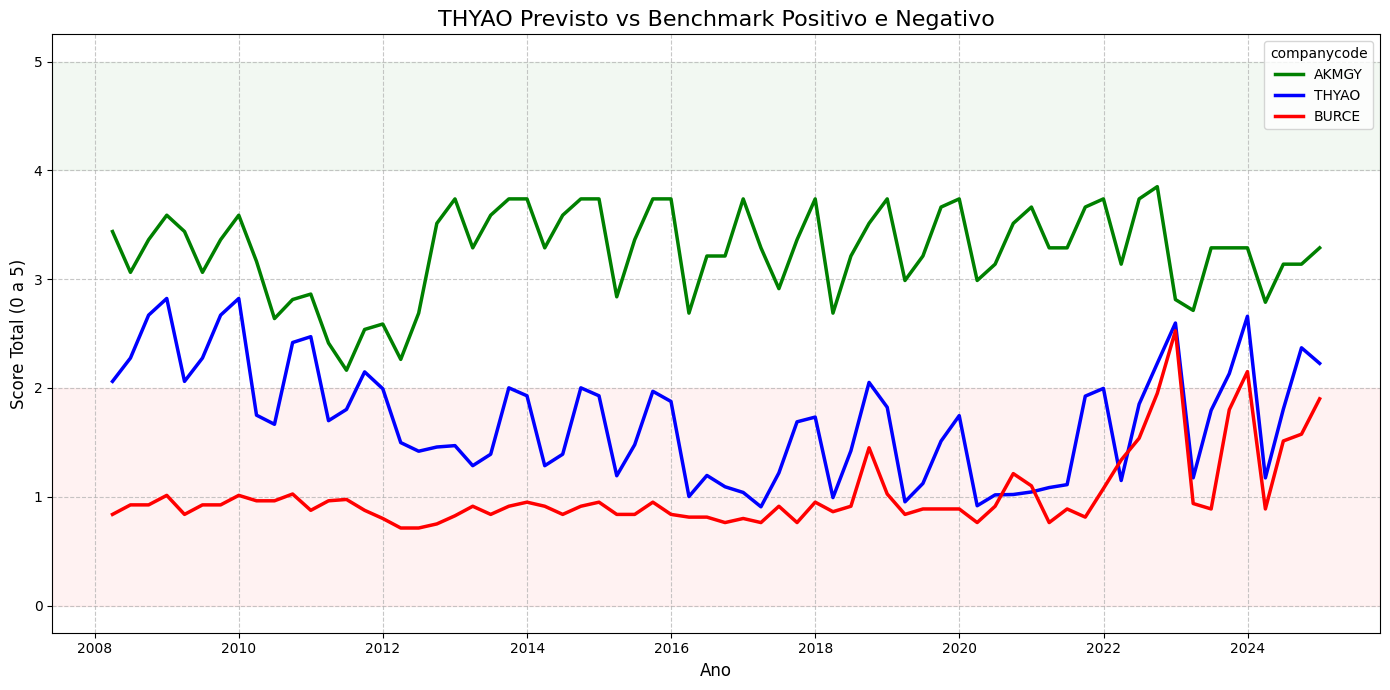

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates  # <--- Importante para formatar datas

# ... (seu código de seleção de empresas e concatenação df_final mantém-se igual) ...

# --- CORREÇÃO 1: Garantir que é datetime ---
# Se ainda não foi convertido no início do script, convertemos agora
df_final['data'] = pd.to_datetime(df_final['data'])

# Ordenar cronologicamente para evitar linhas riscando o gráfico
df_final = df_final.sort_values('data')

# --- PLOTAGEM ---
plt.figure(figsize=(14, 7))

sns.lineplot(
    data=df_final,
    x='data',
    y='score_total',
    hue='companycode',
    palette={melhor_empresa: 'green', 'THYAO': 'blue', pior_empresa: 'red'},
    hue_order=[melhor_empresa, 'THYAO', pior_empresa],
    linewidth=2.5
)

# --- CORREÇÃO 2: Formatar o Eixo X ---
ax = plt.gca() # Pega o eixo atual

# Define os intervalos principais (ex: a cada 2 anos)
ax.xaxis.set_major_locator(mdates.YearLocator(2)) 

# Define o formato do texto (Apenas o Ano)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title('THYAO Previsto vs Benchmark Positivo e Negativo', fontsize=16)
plt.axhspan(4, 5, color='green', alpha=0.05, label='Excelência') # Adicionei label opcional
plt.axhspan(0, 2, color='red', alpha=0.05, label='Risco Elevado')

plt.ylabel('Score Total (0 a 5)', fontsize=12)
plt.xlabel('Ano', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()